In [1]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 1s 1us/step


In [9]:
len(train_data)

8982

In [10]:
len(test_data)

2246

In [11]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [12]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join(
    [reverse_word_index.get(i - 3,"?") for i in train_data[0]])

550378/550378 [==============================] - 1s 2us/step


In [14]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data) # 훈련 데이터 벡터 변환
x_test = vectorize_sequences(test_data) # 테스트 데이터 벡터 변환

In [15]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train = to_one_hot(train_labels) # 훈련 레이블 벡터 변환
y_test = to_one_hot(test_labels) # 테스트 레이블 벡터 변환

In [16]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [18]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [19]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [21]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 4s 76ms/step - loss: 2.6219 - accuracy: 0.5091 - val_loss: 1.7466 - val_accuracy: 0.6350
Epoch 2/20
16/16 [==============================] - 1s 48ms/step - loss: 1.4896 - accuracy: 0.6833 - val_loss: 1.3493 - val_accuracy: 0.6910
Epoch 3/20
16/16 [==============================] - 1s 43ms/step - loss: 1.1599 - accuracy: 0.7466 - val_loss: 1.1672 - val_accuracy: 0.7350
Epoch 4/20
16/16 [==============================] - 1s 44ms/step - loss: 0.9485 - accuracy: 0.7928 - val_loss: 1.0727 - val_accuracy: 0.7630
Epoch 5/20
16/16 [==============================] - 1s 53ms/step - loss: 0.7834 - accuracy: 0.8249 - val_loss: 0.9969 - val_accuracy: 0.7740
Epoch 6/20
16/16 [==============================] - 1s 40ms/step - loss: 0.6567 - accuracy: 0.8562 - val_loss: 0.9244 - val_accuracy: 0.7980
Epoch 7/20
16/16 [==============================] - 1s 45ms/step - loss: 0.5465 - accuracy: 0.8840 - val_loss: 0.8957 - val_accuracy: 0.8100
Epoch 8/20
16

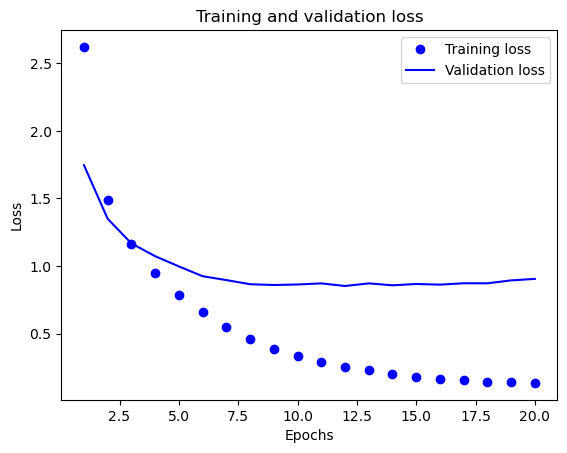

In [22]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


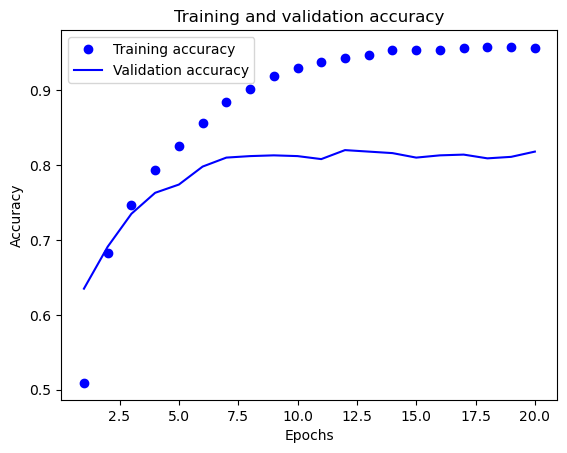

In [26]:
plt.clf() #그래프를 초기화합니다.

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [27]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/9
16/16 [==============================] - 4s 100ms/step - loss: 2.7493 - accuracy: 0.4922 - val_loss: 1.8450 - val_accuracy: 0.6260
Epoch 2/9
16/16 [==============================] - 1s 50ms/step - loss: 1.5418 - accuracy: 0.6783 - val_loss: 1.3861 - val_accuracy: 0.6900
Epoch 3/9
16/16 [==============================] - 1s 45ms/step - loss: 1.1842 - accuracy: 0.7407 - val_loss: 1.1862 - val_accuracy: 0.7380
Epoch 4/9
16/16 [==============================] - 1s 52ms/step - loss: 0.9732 - accuracy: 0.7914 - val_loss: 1.0761 - val_accuracy: 0.7630
Epoch 5/9
16/16 [==============================] - 1s 44ms/step - loss: 0.8129 - accuracy: 0.8251 - val_loss: 1.0145 - val_accuracy: 0.7740
Epoch 6/9
16/16 [==============================] - 1s 41ms/step - loss: 0.6759 - accuracy: 0.8545 - val_loss: 0.9685 - val_accuracy: 0.7760
Epoch 7/9
16/16 [==============================] - 1s 49ms/step - loss: 0.5694 - accuracy: 0.8767 - val_loss: 0.9083 - val_accuracy: 0.8050
Epoch 8/9
16/16 [==

In [29]:
results

[0.959861159324646, 0.7858415246009827]

In [33]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.1803205699020481

In [34]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 6ms/step


In [35]:
predictions[0].shape

(46,)

In [36]:
np.sum(predictions[0])

0.99999994

In [37]:
np.argmax(predictions[0])

3

In [38]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [39]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 4s 33ms/step - loss: 3.1819 - accuracy: 0.2831 - val_loss: 2.4600 - val_accuracy: 0.5050
Epoch 2/20
63/63 [==============================] - 1s 22ms/step - loss: 1.9766 - accuracy: 0.5428 - val_loss: 1.7419 - val_accuracy: 0.5720
Epoch 3/20
63/63 [==============================] - 1s 21ms/step - loss: 1.5441 - accuracy: 0.5958 - val_loss: 1.5570 - val_accuracy: 0.6230
Epoch 4/20
63/63 [==============================] - 1s 21ms/step - loss: 1.3708 - accuracy: 0.6482 - val_loss: 1.4914 - val_accuracy: 0.6330
Epoch 5/20
63/63 [==============================] - 1s 22ms/step - loss: 1.2548 - accuracy: 0.6683 - val_loss: 1.4300 - val_accuracy: 0.6380
Epoch 6/20
63/63 [==============================] - 1s 21ms/step - loss: 1.1656 - accuracy: 0.6825 - val_loss: 1.4158 - val_accuracy: 0.6650
Epoch 7/20
63/63 [==============================] - 1s 23ms/step - loss: 1.0929 - accuracy: 0.7181 - val_loss: 1.3922 - val_accuracy: 0.6770
Epoch 8/20
63

In [41]:
model = models.Sequential() #중간층 1개 batchsize 32
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=32,
          validation_data=(x_val, y_val))

Epoch 1/20
250/250 [==============================] - 6s 19ms/step - loss: 1.4545 - accuracy: 0.6904 - val_loss: 1.0347 - val_accuracy: 0.7730
Epoch 2/20
250/250 [==============================] - 5s 19ms/step - loss: 0.7403 - accuracy: 0.8385 - val_loss: 0.8462 - val_accuracy: 0.8210
Epoch 3/20
250/250 [==============================] - 4s 15ms/step - loss: 0.4643 - accuracy: 0.8976 - val_loss: 0.8435 - val_accuracy: 0.8260
Epoch 4/20
250/250 [==============================] - 4s 16ms/step - loss: 0.3221 - accuracy: 0.9285 - val_loss: 0.8937 - val_accuracy: 0.8090
Epoch 5/20
250/250 [==============================] - 4s 15ms/step - loss: 0.2495 - accuracy: 0.9425 - val_loss: 0.8769 - val_accuracy: 0.8230
Epoch 6/20
250/250 [==============================] - 4s 16ms/step - loss: 0.2095 - accuracy: 0.9493 - val_loss: 0.9345 - val_accuracy: 0.8200
Epoch 7/20
250/250 [==============================] - 4s 16ms/step - loss: 0.1859 - accuracy: 0.9524 - val_loss: 0.9913 - val_accuracy: 0.8110

In [42]:
model = models.Sequential() #중간층 3개 batchsize 128
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 5s 37ms/step - loss: 1.8842 - accuracy: 0.5821 - val_loss: 1.3071 - val_accuracy: 0.7000
Epoch 2/20
63/63 [==============================] - 2s 29ms/step - loss: 1.0889 - accuracy: 0.7453 - val_loss: 1.0995 - val_accuracy: 0.7490
Epoch 3/20
63/63 [==============================] - 2s 25ms/step - loss: 0.7644 - accuracy: 0.8276 - val_loss: 1.0696 - val_accuracy: 0.7790
Epoch 4/20
63/63 [==============================] - 1s 24ms/step - loss: 0.5475 - accuracy: 0.8712 - val_loss: 1.0587 - val_accuracy: 0.7780
Epoch 5/20
63/63 [==============================] - 2s 30ms/step - loss: 0.3958 - accuracy: 0.9121 - val_loss: 1.0230 - val_accuracy: 0.7980
Epoch 6/20
63/63 [==============================] - 2s 26ms/step - loss: 0.3022 - accuracy: 0.9293 - val_loss: 1.0603 - val_accuracy: 0.7890
Epoch 7/20
63/63 [==============================] - 2s 25ms/step - loss: 0.2468 - accuracy: 0.9431 - val_loss: 1.2336 - val_accuracy: 0.7810
Epoch 8/20
63

In [43]:
model = models.Sequential() #중간층 3개 batchsize 32
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=32,
          validation_data=(x_val, y_val))

Epoch 1/20
250/250 [==============================] - 7s 21ms/step - loss: 1.5655 - accuracy: 0.6490 - val_loss: 1.1774 - val_accuracy: 0.7270
Epoch 2/20
250/250 [==============================] - 4s 18ms/step - loss: 0.9022 - accuracy: 0.7969 - val_loss: 1.0061 - val_accuracy: 0.7830
Epoch 3/20
250/250 [==============================] - 4s 18ms/step - loss: 0.6052 - accuracy: 0.8606 - val_loss: 0.9710 - val_accuracy: 0.7930
Epoch 4/20
250/250 [==============================] - 5s 18ms/step - loss: 0.4199 - accuracy: 0.9027 - val_loss: 1.0312 - val_accuracy: 0.8120
Epoch 5/20
250/250 [==============================] - 5s 20ms/step - loss: 0.3157 - accuracy: 0.9272 - val_loss: 1.1542 - val_accuracy: 0.8020
Epoch 6/20
250/250 [==============================] - 5s 19ms/step - loss: 0.2588 - accuracy: 0.9421 - val_loss: 1.2237 - val_accuracy: 0.7950
Epoch 7/20
250/250 [==============================] - 5s 18ms/step - loss: 0.2189 - accuracy: 0.9483 - val_loss: 1.2559 - val_accuracy: 0.7920

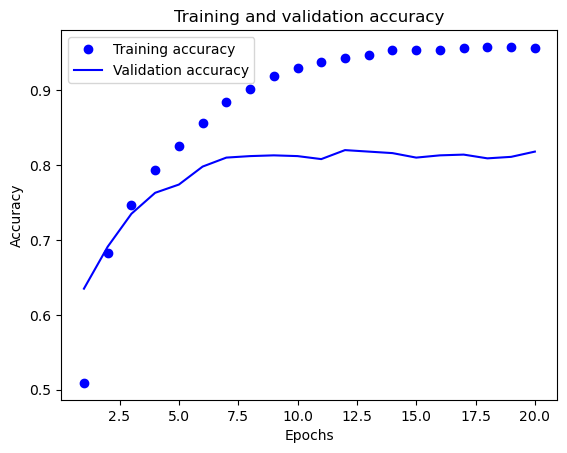

In [44]:
plt.clf() #그래프를 초기화합니다.

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()